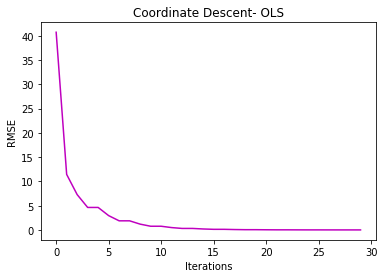

array([[ 5.27272727],
       [ 1.99976279],
       [-1.27257632]])

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.array([[1,5,1],[2,4,2],[3,3,3],[4,2,4],[5,1,5]])
y = np.array([[14,16,18,20,22]]).T

B = np.random.rand(len(x.T))

def CD(x,y,Btr,i):
    B = np.array([[0.0]]*len(x.T)) 
    MSE = []
    for i in np.arange(i):
        for b in np.arange(len(x.T)):
            Error = np.sum((y-x.dot(B))**2)**0.5
            B[b] = x[:,b].T.dot((y - np.delete(x,b,axis=1).dot(np.delete(B,b,axis=0))))/x[:,b].T.dot(x[:,b])
            MSE.append(Error)
    plt.plot(MSE,'-m')
    plt.xlabel("Iterations")
    plt.ylabel("RMSE")
    plt.title("Coordinate Descent- OLS")
    plt.show()
    return B

Bl =CD(x,y,B,10)
Bl

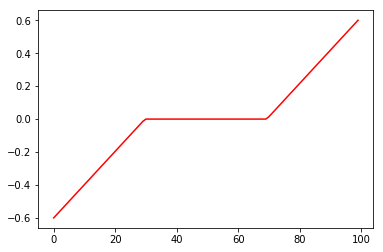

In [4]:
def Soft(x,e):
    if x>e:
        value = x-e
    else:
        if abs(x)<=e:
            value = 0
        else:
            if x<-1*e:
                value = x+e
    return value

def ABS(L,e):
    PL = []
    for i in L:
        v = Soft(i,e)
        PL.append(v)
    plt.plot(PL,'-r')
    plt.show()

L = np.linspace(-1,1,100)
ABS(L,0.4)

In [5]:
def SQLoss(x,y,B):                    #Root Mean Squared Loss (y-ŷ)²
    Loss = (np.sum((y - x.dot(B))**2)/len(x))**0.5
    return Loss

def StochasticGD(x,y,x2,y2,mu,λa,epoch,i):     # mu-step size, λa Ridge,  i- batchsize
    ErrTr = []                                  #To store the error on trial data
    ErrTst = []
    Btr = np.array([[1]]*len(x.T))              #Betas values Initialized to 1
    for n in np.arange(epoch):                  #Number of times to run an epoch
        xy= np.concatenate((x,y),axis=1)
        L = np.random.shuffle(xy)
        n= 0
        for h in np.arange(len(xy)//i +1):
            x = xy[:,0:-1]
            y = np.array([xy[:,-1]]).T
            xt= x[n*i:(n+1)*i]
            yt= y[n*i:(n+1)*i]
            n=n+1
            Gd = xt.T.dot(yt -xt.dot(Btr))  #Gradient
            Bn = (1-2*λa*mu)*Btr + mu*Gd    #Calculates the new value of Betas
            Btr = Bn
            ErTr = SQLoss(x,y,Bn)
            ErTst = SQLoss(x2,y2,Bn)
            ErrTr.append(ErTr)
            ErrTst.append(ErTst)
    plt.plot(ErrTr)                 
    plt.plot(ErrTst)
    plt.title("Stochastic Ridge GD - RMSE vs Iteration")
    plt.xlabel("Iteration")    
    plt.ylabel("RMSE")
    plt.legend(["Training","Test"])
    plt.show() 
    
StochasticGD(D2xtr,D2ytr,D2xtst,D2ytst,1e-3,0,10,100)    

NameError: name 'D2xtr' is not defined

In [3]:
# The coefficients
print("Coefficients: \n", SGD.coef_)
print("")
D2predSGD = SGD.predict(D2xtst)
plt.plot(D2ytst,'bo',markersize=1)
plt.plot(D2predSGD,'ro',markersize=1)
plt.show()
print("Mean squared error: %.4f" %mean_squared_error(D2ytst,D2predSGD))

NameError: name 'SGD' is not defined

In [ ]:
def Soft(x,e):
    if x>e:
        value = x-e
    else:
        if abs(x)<=e:
            value = 0
        else:
            if x<-1*e:
                value = x+e
    return value

def Lasso(x,y,x2,y2,λ,epoch,i):                 #i- batchsize
    ErrTr = []                                  #To store the error on trial data
    ErrTst = []
    Btr = np.array([[10.0]]*len(x.T))              #Betas values Initialized to 1
    for n in np.arange(epoch):                  #Number of times to run an epoch
        xy= np.concatenate((x,y),axis=1)
        L = np.random.shuffle(xy)
        n= 0
        for h in np.arange(len(xy)//i +1):
            x = xy[:,0:-1]
            y = np.array([xy[:,-1]]).T
            xt= x[n*i:(n+1)*i]
            yt= y[n*i:(n+1)*i]
            n=n+1
            for b in np.arange(len(Btr)):
                val    = float(xt[:,b].T.dot((yt - np.delete(xt,b,axis=1).dot(np.delete(Btr,b,axis=0))))/xt[:,b].T.dot(xt[:,b]))
                e      = 0.5*λ/xt[:,b].T.dot(xt[:,b])
                Btr[b] = Soft(val,e)
        ErTr = SQLoss(x,y,Btr)
        ErTst = SQLoss(x2,y2,Btr)
        ErrTr.append(ErTr)
        ErrTst.append(ErTst)
    plt.plot(ErrTr)                 
    plt.plot(ErrTst)
    plt.title("Coordinate GD LASSO - RMSE vs Epoch")
    plt.xlabel("Epoch")    
    plt.ylabel("RMSE")
    plt.legend(["Training","Test"])
    plt.show() 
    return Btr

Lasso(D2xtr,D2ytr,D2xtst,D2ytst,7,20,5)